In [2]:
import pandas as pd 

In [5]:
tracks = pd.read_csv('SpotGenTrack/Data Sources/spotify_tracks.csv', index_col = 0)
albums = pd.read_csv('SpotGenTrack/Data Sources/spotify_albums.csv', index_col = 0)
artists = pd.read_csv('SpotGenTrack/Data Sources/spotify_artists.csv', index_col = 0)

In [8]:
#correlation threshold?

## Filter Tracks DF

In [6]:
tracks.corrwith(tracks["popularity"]).abs().sort_values()

/var/folders/vg/5yh2xcmn0msf83s5nl8f296r0000gn/T/ipykernel_19259/2920250553.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tracks.corrwith(tracks["popularity"]).abs().sort_values()


key                 0.000641
mode                0.010003
valence             0.034412
instrumentalness    0.041537
disc_number         0.047331
liveness            0.059116
tempo               0.061869
danceability        0.092382
time_signature      0.121505
track_number        0.139460
energy              0.153979
acousticness        0.154408
duration_ms         0.169125
loudness            0.239679
speechiness         0.304212
popularity          1.000000
dtype: float64

In [7]:
len(tracks)

101939

In [8]:
tracks.columns

Index(['acousticness', 'album_id', 'analysis_url', 'artists_id',
       'available_markets', 'country', 'danceability', 'disc_number',
       'duration_ms', 'energy', 'href', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'lyrics', 'mode', 'name', 'playlist',
       'popularity', 'preview_url', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'track_name_prev', 'track_number', 'uri', 'valence',
       'type'],
      dtype='object')

In [9]:
#rename id to track_id
tracks.rename(columns={'id': 'track_id'},inplace=True)

In [10]:
include_col_tracks = ["track_id","time_signature","track_number","energy","acousticness","duration_ms","loudness","speechiness","popularity", "album_id", "artists_id"]      

In [11]:
len(include_col_tracks)

11

In [12]:
tracks_filtered = tracks[include_col_tracks]
tracks_filtered.columns

Index(['track_id', 'time_signature', 'track_number', 'energy', 'acousticness',
       'duration_ms', 'loudness', 'speechiness', 'popularity', 'album_id',
       'artists_id'],
      dtype='object')

## Filter albums DF

In [13]:
albums.columns

Index(['album_type', 'artist_id', 'available_markets', 'external_urls', 'href',
       'id', 'images', 'name', 'release_date', 'release_date_precision',
       'total_tracks', 'track_id', 'track_name_prev', 'uri', 'type'],
      dtype='object')

In [14]:
albums.rename(columns={'id': 'album_id'},inplace=True)

In [15]:
#albums_tracks = tracks.merge(albums,left_on="track_id",right_on="track_id",how="left")
#join on album_id works better
albums_tracks = tracks.merge(albums,left_on="album_id",right_on="album_id", how="left")
albums_tracks.corrwith(albums_tracks["popularity"]).abs().sort_values()

/var/folders/vg/5yh2xcmn0msf83s5nl8f296r0000gn/T/ipykernel_19259/2581811509.py:4: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  albums_tracks.corrwith(albums_tracks["popularity"]).abs().sort_values()


key                 0.000641
mode                0.010003
valence             0.034412
instrumentalness    0.041537
disc_number         0.047331
liveness            0.059116
tempo               0.061869
danceability        0.092382
time_signature      0.121505
total_tracks        0.132356
track_number        0.139460
energy              0.153979
acousticness        0.154408
duration_ms         0.169125
loudness            0.239679
speechiness         0.304212
popularity          1.000000
dtype: float64

In [16]:
albums_tracks.isna().sum()

acousticness              0
album_id                  0
analysis_url              0
artists_id                0
available_markets_x       0
country                   0
danceability              0
disc_number               0
duration_ms               0
energy                    0
href_x                    0
track_id_x                0
instrumentalness          0
key                       0
liveness                  0
loudness                  0
lyrics                    0
mode                      0
name_x                    0
playlist                  0
popularity                0
preview_url               0
speechiness               0
tempo                     0
time_signature            0
track_href                0
track_name_prev_x         0
track_number              0
uri_x                     0
valence                   0
type_x                    0
album_type                0
artist_id                 0
available_markets_y       0
external_urls             0
href_y              

In [17]:
albums_include = ['album_type', 'artist_id', 'available_markets','total_tracks', 'track_id', 'track_name_prev','release_date',"album_id"]

In [18]:
len(albums_include)

8

In [19]:
albums_filtered = albums[albums_include]
albums_filtered.columns

Index(['album_type', 'artist_id', 'available_markets', 'total_tracks',
       'track_id', 'track_name_prev', 'release_date', 'album_id'],
      dtype='object')

In [20]:
#albums_tracks = tracks_filtered.merge(albums_filtered,left_on="track_id",right_on="track_id",how="left")
albums_tracks = tracks_filtered.merge(albums_filtered,left_on="album_id",right_on="album_id", how="left")
albums_tracks.corrwith(albums_tracks["popularity"]).abs().sort_values()

/var/folders/vg/5yh2xcmn0msf83s5nl8f296r0000gn/T/ipykernel_19259/335101616.py:3: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  albums_tracks.corrwith(albums_tracks["popularity"]).abs().sort_values()


time_signature    0.121505
total_tracks      0.132356
track_number      0.139460
energy            0.153979
acousticness      0.154408
duration_ms       0.169125
loudness          0.239679
speechiness       0.304212
popularity        1.000000
dtype: float64

In [21]:
albums_tracks.isna().sum()

track_id_x           0
time_signature       0
track_number         0
energy               0
acousticness         0
duration_ms          0
loudness             0
speechiness          0
popularity           0
album_id             0
artists_id           0
album_type           0
artist_id            0
available_markets    0
total_tracks         0
track_id_y           0
track_name_prev      0
release_date         0
dtype: int64

## Artists Filter DF

In [22]:
artists.head()
artists.rename(columns={"id": "artist_id_artists"},inplace=True)
artists.columns

Index(['artist_popularity', 'followers', 'genres', 'artist_id_artists', 'name',
       'track_id', 'track_name_prev', 'type'],
      dtype='object')

## Merge albums, tracks, artists

In [23]:
albums_tracks_artistis = albums_tracks.merge(artists, left_on="artist_id",right_on="artist_id_artists",how="left")

In [24]:
albums_tracks_artistis.isna().sum()

track_id_x             0
time_signature         0
track_number           0
energy                 0
acousticness           0
duration_ms            0
loudness               0
speechiness            0
popularity             0
album_id               0
artists_id             0
album_type             0
artist_id              0
available_markets      0
total_tracks           0
track_id_y             0
track_name_prev_x      0
release_date           0
artist_popularity    795
followers            795
genres               795
artist_id_artists    795
name                 795
track_id             795
track_name_prev_y    795
type                 795
dtype: int64

In [25]:
albums_tracks_artistis.columns

Index(['track_id_x', 'time_signature', 'track_number', 'energy',
       'acousticness', 'duration_ms', 'loudness', 'speechiness', 'popularity',
       'album_id', 'artists_id', 'album_type', 'artist_id',
       'available_markets', 'total_tracks', 'track_id_y', 'track_name_prev_x',
       'release_date', 'artist_popularity', 'followers', 'genres',
       'artist_id_artists', 'name', 'track_id', 'track_name_prev_y', 'type'],
      dtype='object')

In [26]:
print("number of rows in merged: ",(len(albums_tracks_artistis.columns)))

number of rows in merged:  26


In [27]:
print("number of rows in merged: ",(len(albums_tracks_artistis)))

number of rows in merged:  101939


## Lyrics

In [30]:
lyrics_features = pd.read_csv('SpotGenTrack/Features Extracted/lyrics_features.csv', index_col = 0)

In [31]:
lyrics_features.columns

Index(['mean_syllables_word', 'mean_words_sentence', 'n_sentences', 'n_words',
       'sentence_similarity', 'track_id', 'vocabulary_wealth'],
      dtype='object')

In [32]:
albums_tracks_artistis_lyr = albums_tracks_artistis.merge(lyrics_features,left_on="track_id",right_on="track_id",how="left")

In [33]:
albums_tracks_artistis.isnull().sum()

track_id_x             0
time_signature         0
track_number           0
energy                 0
acousticness           0
duration_ms            0
loudness               0
speechiness            0
popularity             0
album_id               0
artists_id             0
album_type             0
artist_id              0
available_markets      0
total_tracks           0
track_id_y             0
track_name_prev_x      0
release_date           0
artist_popularity    795
followers            795
genres               795
artist_id_artists    795
name                 795
track_id             795
track_name_prev_y    795
type                 795
dtype: int64

In [34]:
print(len(albums_tracks_artistis_lyr.columns))

32


In [35]:
print(len(albums_tracks_artistis_lyr))

101939


In [36]:
albums_tracks_artistis_lyr.isna().sum()

track_id_x                0
time_signature            0
track_number              0
energy                    0
acousticness              0
duration_ms               0
loudness                  0
speechiness               0
popularity                0
album_id                  0
artists_id                0
album_type                0
artist_id                 0
available_markets         0
total_tracks              0
track_id_y                0
track_name_prev_x         0
release_date              0
artist_popularity       795
followers               795
genres                  795
artist_id_artists       795
name                    795
track_id                795
track_name_prev_y       795
type                    795
mean_syllables_word    7234
mean_words_sentence    7234
n_sentences            7234
n_words                7234
sentence_similarity    7234
vocabulary_wealth      7234
dtype: int64

## AUDIO

In [37]:
audio_features = pd.read_csv('SpotGenTrack/Features Extracted/low_level_audio_features.csv', index_col = 0)
audio_features.head()

,Chroma_1,Chroma_10,Chroma_11,Chroma_12,Chroma_2,Chroma_3,Chroma_4,Chroma_5,Chroma_6,Chroma_7,...,Tonnetz_4,Tonnetz_5,Tonnetz_6,ZCR,entropy_energy,spectral_bandwith,spectral_centroid,spectral_rollOff_max,spectral_rollOff_min,track_id
0,0.438296,0.472769,0.427441,0.436688,0.467697,0.493862,0.512244,0.568658,0.560524,0.513068,...,0.018434,-0.001759,-0.006392,0.067966,-89.113389,2564.247669,3558.400706,4508.506071,367.831109,19YEk4OVQZn3GfoxbpNrU6
1,0.596605,0.368288,0.285263,0.302211,0.905805,0.510909,0.221708,0.311248,0.491277,0.416469,...,0.046941,0.005665,-0.026928,0.047308,-127.945239,2370.181495,1499.689590,3647.394611,230.165275,6zJms3MX11Qu1IKF44LoRW
2,0.505224,0.500420,0.506773,0.488258,0.498356,0.573582,0.690761,0.742858,0.686282,0.657118,...,-0.006929,0.004968,0.008947,0.058463,-238.285176,2973.294736,1543.550034,5623.349330,187.290534,1WugzepXsLjnsM0K4UaWYc
3,0.525690,0.666469,0.579492,0.498920,0.598528,0.631578,0.501693,0.500468,0.587101,0.546499,...,-0.027382,-0.009689,0.001402,0.080547,-148.785733,2716.749483,3017.248824,5799.931595,160.940693,1pSlTbCrUJ9rmwj5CNNrX4
4,0.632214,0.503698,0.496942,0.611532,0.634613,0.697265,0.557012,0.530836,0.444279,0.466659,...,0.003728,-0.002780,-0.010120,0.084945,-176.618314,3096.692876,2118.686992,6560.018666,229.131948,5yruvWJs3mL00w4slpCVzN


In [60]:
#Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [61]:
#Separate numeric and string columns (track_id) as PCA can only be performed on numeric columns
numeric_columns = audio_features.select_dtypes(include=['number']).columns
non_numeric_columns = audio_features.select_dtypes(exclude=['number']).columns

numeric_data = audio_features[numeric_columns]
non_numeric_data = audio_features[non_numeric_columns]

#Standardize numeric data
scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_data)

#Here choose number of columns to which data should be reduced and perform PCA
n_components = 10
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_numeric_data)

#Reduce to number of components that still explain 95% of the variance
pca = PCA(n_components=0.95)

principal_components = pca.fit_transform(scaled_numeric_data)
n_components = principal_components.shape[1]
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components+1)])
processed_data = pd.concat([non_numeric_data.reset_index(drop=True), principal_df], axis=1)
print(processed_data)

                      track_id        PC1       PC2       PC3       PC4  \
0       19YEk4OVQZn3GfoxbpNrU6  -9.373173  1.207779  2.579315  5.509278   
1       6zJms3MX11Qu1IKF44LoRW  -4.340399 -4.404526  6.123797 -0.176404   
2       1WugzepXsLjnsM0K4UaWYc   2.786318  0.128274 -0.785948 -2.562150   
3       1pSlTbCrUJ9rmwj5CNNrX4  14.035909 -8.195006 -0.928468  6.569178   
4       5yruvWJs3mL00w4slpCVzN   5.757036 -3.013227  1.666180  2.457010   
...                        ...        ...       ...       ...       ...   
101904  64iZLIYuqRR8rNedN0Yvnh   7.218389  0.844754 -5.011449  1.988921   
101905  0qo0ibv3YoVwJ3jKjpB8lQ  -3.587573  0.517763 -1.047101 -1.839291   
101906  1B7tV3WzEnDUS7wXSKDXk3  12.685639 -2.726685 -0.759665  0.255639   
101907  7DVr6Az7HukAZeK7v3cGZx  12.616335 -4.502690 -3.434090  6.583917   
101908  6Tgjsd4bD8eb74HOTCr6LC  -3.007530  2.915291 -2.026890 -0.163060   

             PC5       PC6       PC7       PC8       PC9  ...      PC79  \
0      -3.643796  0.0243

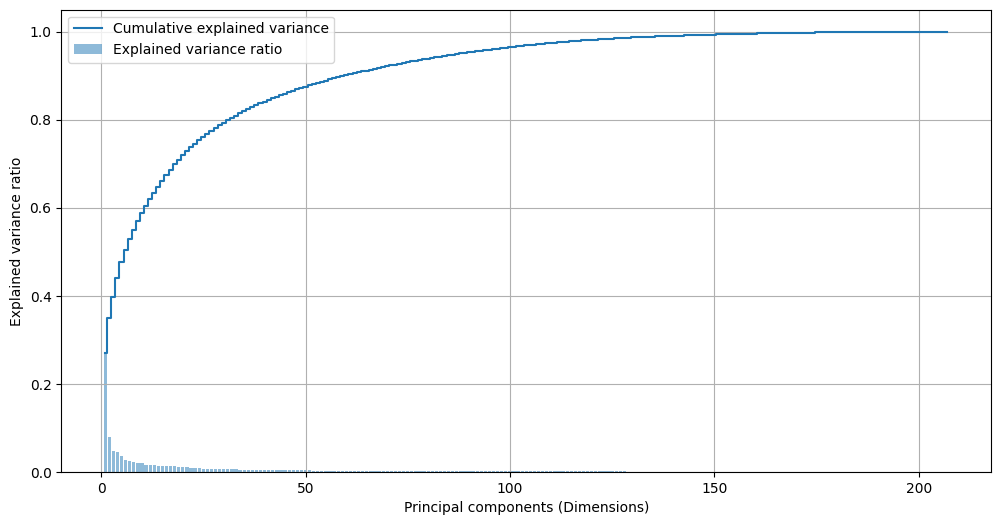

In [62]:
#Visual representation of explained variance ratio and number of components
import matplotlib.pyplot as plt
import numpy as np

pca_full = PCA()
principal_components_full = pca_full.fit_transform(scaled_numeric_data)
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

x = np.arange(1, len(explained_variance_ratio) + 1)

plt.figure(figsize=(12, 6))
plt.bar(x, explained_variance_ratio, alpha=0.5, align='center', label='Explained variance ratio')
plt.step(x, cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components (Dimensions)')
plt.legend(loc='best')
plt.grid()
plt.show()

In [63]:
albums_tracks_artistis_lyr_audio = albums_tracks_artistis_lyr.merge(processed_data,on="track_id",how="left")

## ALL data DF

In [39]:
len(albums_tracks_artistis_lyr_audio)

101939

In [40]:
albums_tracks_artistis_lyr_audio.shape

(101939, 239)

In [41]:
albums_tracks_artistis_lyr_audio.isna().sum().sort_values(ascending=False)[:20]

mean_words_sentence    7234
vocabulary_wealth      7234
sentence_similarity    7234
n_words                7234
n_sentences            7234
mean_syllables_word    7234
MEL_86                  827
MEL_9                   827
MEL_89                  827
MEL_88                  827
MEL_87                  827
MEL_51                  827
MEL_85                  827
MEL_91                  827
MEL_84                  827
MEL_83                  827
MEL_90                  827
MEL_92                  827
MEL_81                  827
MFCC_10                 827
dtype: int64

In [42]:
all_data = albums_tracks_artistis_lyr_audio
all_data.shape

(101939, 239)

In [43]:
all_data.corrwith(all_data['popularity']).abs().sort_values(ascending=False)

/var/folders/vg/5yh2xcmn0msf83s5nl8f296r0000gn/T/ipykernel_19259/2376672832.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_data.corrwith(all_data['popularity']).abs().sort_values(ascending=False)


popularity             1.000000
artist_popularity      0.649121
speechiness            0.304212
followers              0.286363
MFCC_1                 0.276906
                         ...   
MFCC_46                0.006349
Chroma_7               0.005228
MFCC_38                0.003591
MFCC_40                0.003087
Spectral_contrast_1    0.001124
Length: 224, dtype: float64

In [44]:
all_data["artist_popularity"].isna().sum()

795

## Analysis of popularity

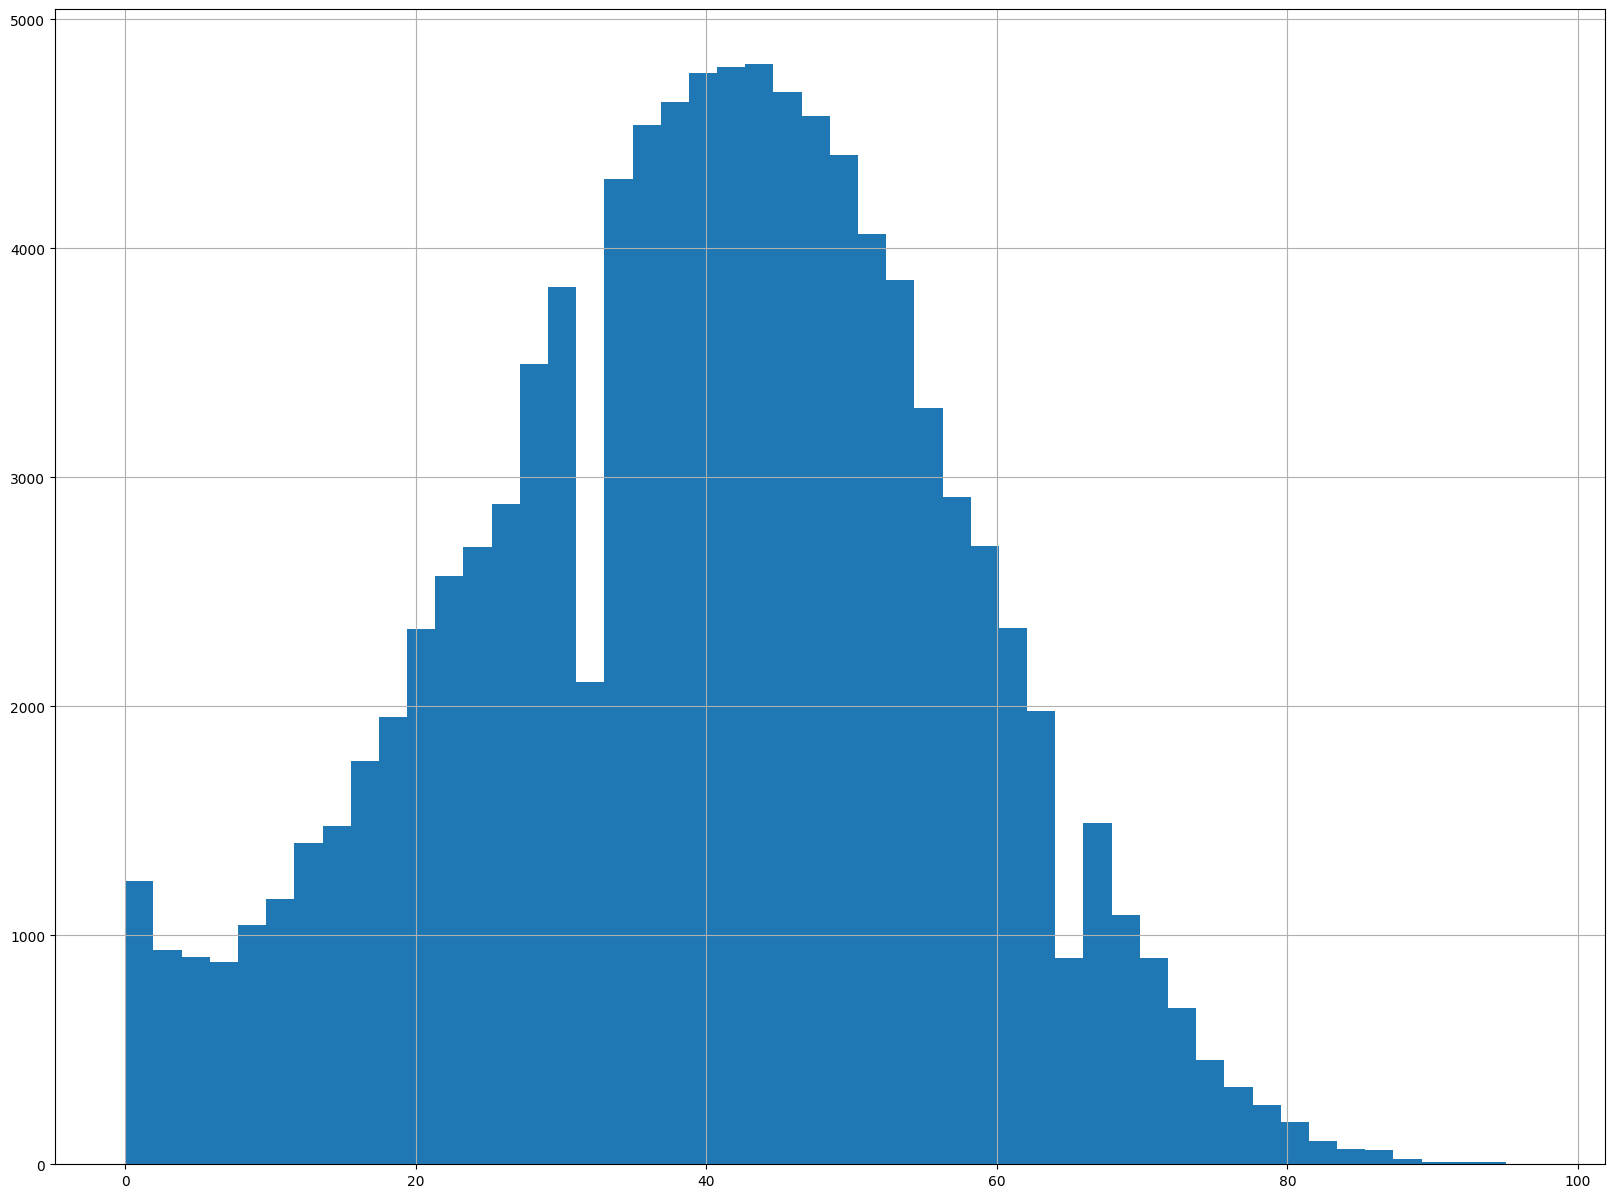

In [45]:
import matplotlib.pyplot as plt


tracks["popularity"].hist(bins=50, figsize=(20,15))

plt.show()

In [46]:
tracks.sort_values(by="popularity",ascending=False)["name"][:20]

90024                                       Calma - Remix
101706                                   Sweet but Psycho
100168                            Going Bad (feat. Drake)
100625                                               Talk
94579                                     i'm so tired...
101732                                  MIA (feat. Drake)
94452                                          High Hopes
89186                         Giant (with Rag'n'Bone Man)
100383                                         Adan y Eva
89648                                   Baila Baila Baila
86219                                   Murder On My Mind
91256                                          SICKO MODE
92713                                  Let Me Down Slowly
92734                                           Please Me
93924                  ZEZE (feat. Travis Scott & Offset)
93012                                               a lot
74129                                            Thotiana
90029         

In [47]:
#outliers in label
from scipy.stats import zscore
z_scores = zscore(all_data_sources['popularity'])
potential_outliers = all_data_sources[(z_scores > 3) | (z_scores < -3)]
potential_outliers[["name_track","popularity"]]

NameError: name 'all_data_sources' is not defined

## prepro pipeline

#notes for pipeline:
- train model with train data 
- Include categorical columns of track df
- Include hanna’s version of audio features df 
- Drop track id before transforming
- After scaling correlations super low- Imputer strategy for artist_popularity 


In [48]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

In [49]:
#define features and labels 
X = all_data.drop(columns=["popularity"])
y = all_data["popularity"]

In [50]:
#train test split 
train_data, test_data = train_test_split(all_data, test_size=0.2, random_state=42)

In [51]:
train_data.shape

(81551, 239)

In [52]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names]

    
def get_preprocessor(data):
    
    num_attribs = data.select_dtypes(include=['float64', 'int64']).columns
    cat_attribs = data.select_dtypes(include=['object']).columns
    
    num_pipeline = Pipeline([
            ('selector', DataFrameSelector(num_attribs)),
            ('imputer', SimpleImputer(strategy="median")),
            ('std_scaler', StandardScaler()),
        ])
    
    cat_pipeline = Pipeline([
            ('selector', DataFrameSelector(cat_attribs)),
            ('cat_encoder', OneHotEncoder(sparse=False)),
        ])
    
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])
    
    return full_pipeline

In [53]:
preprocessor = get_preprocessor(train_data)

In [54]:
type(preprocessor)

sklearn.compose._column_transformer.ColumnTransformer

In [55]:
data_prepared = preprocessor.fit_transform(train_data[:500])
#for x in data_prepared:
#    print(len(x))
#now 4700 columns

/usr/local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [56]:
data_prepared.shape

(500, 5057)

## Check for correlations with (encoded) features

In [57]:
# Get the original column names
num_attribs = list(all_data.select_dtypes(include=['float64', 'int64']).columns)
cat_attribs = list(all_data.select_dtypes(include=['object']).columns)

# Get the transformed column names
transformed_num_cols = preprocessor.transformers_[0][2].tolist()
transformed_cat_cols = list(preprocessor.named_transformers_['cat']['cat_encoder'].get_feature_names_out(cat_attribs))

# Create a mapping of transformed column names to original column names
transformed_cols = transformed_num_cols + transformed_cat_cols
orig_cols_expanded = []

for col in all_data.columns:
    if col in cat_attribs:
        one_hot_cols = [t_col for t_col in transformed_cat_cols if t_col.startswith(col + "_")]
        orig_cols_expanded.extend([col] * len(one_hot_cols))
    else:
        orig_cols_expanded.append(col)

col_mapping = dict(zip(transformed_cols, orig_cols_expanded))

# Create the correlation matrix
corr_matrix = pd.DataFrame(data_prepared, columns=transformed_cols).corr()

# Rename the columns of the correlation matrix using the original column names
corr_matrix.rename(columns=col_mapping, index=col_mapping, inplace=True)

# Print the correlation matrix
print(corr_matrix)

            track_id_x  track_id_x  track_id_x  track_id_x  track_id_x  \
track_id_x    1.000000    0.025870    0.221201   -0.106896    0.031829   
track_id_x    0.025870    1.000000   -0.197510    0.164361   -0.062149   
track_id_x    0.221201   -0.197510    1.000000   -0.684732   -0.129624   
track_id_x   -0.106896    0.164361   -0.684732    1.000000    0.104290   
track_id_x    0.031829   -0.062149   -0.129624    0.104290    1.000000   
...                ...         ...         ...         ...         ...   
track_id      0.009839   -0.023125   -0.011276   -0.015982   -0.020464   
track_id      0.009839   -0.023125    0.049990   -0.046174   -0.009026   
track_id     -0.045383    0.046509   -0.029985    0.080060    0.018286   
track_id      0.045383   -0.046509    0.029985   -0.080060   -0.018286   
track_id     -0.045383    0.046509   -0.029985    0.080060    0.018286   

            track_id_x  track_id_x  track_id_x  track_id_x  track_id_x  ...  \
track_id_x    0.281506   -0.0051

In [58]:
corr_matrix["popularity"].abs().sort_values(ascending=False)

album_id             1.000000
popularity           1.000000
artists_id           1.000000
track_id_y           1.000000
track_name_prev_x    1.000000
                       ...   
track_id_x           0.000523
track_id_x           0.000408
track_id_x           0.000333
track_id_x           0.000081
track_id_x           0.000053
Name: popularity, Length: 5057, dtype: float64

In [59]:
# This correlation is super low?? I think the imputing fucked up the correlations, we need to check
corr_matrix.loc['popularity', 'artist_popularity']

-0.0020040080160320653